In [106]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import random

random.seed(42)
data_path = "../../Data/Kitsune Network Attack Dataset/"

In [107]:
devices_list = os.listdir(data_path)
devices_list = devices_list[::-1]
devices_list

['Video Injection',
 'SYN DoS',
 'SSL Renegotiation',
 'SSDP Flood',
 'OS Scan',
 'Notebook',
 'Mirai Botnet',
 'IID-10-Client_Data',
 'Fuzzing',
 'AUC.txt',
 'ARP MitM',
 'Active Wiretap']

In [108]:
normal_path_lists = []
abnormal_path_lists = []
for device_name in devices_list:
    normal_path = os.path.join(data_path, device_name,"normal")
    abnormal_path = os.path.join(data_path, device_name,"abnormal")
    if os.path.isdir(normal_path):
        for filename in os.listdir(normal_path):
            if "normal" in filename:
                normal_file = os.path.join(normal_path, filename)
                normal_path_lists.append((device_name, normal_file))
    if os.path.isdir(abnormal_path):
        for filename in os.listdir(abnormal_path):
            if "abnormal" in filename or "gafgyt" in filename:
                abnormal_file = os.path.join(abnormal_path, filename)
                abnormal_path_lists.append((device_name, abnormal_file))


In [109]:
abnormal_path_lists

[('Video Injection',
  '../../Data/Kitsune Network Attack Dataset/Video Injection\\abnormal\\Video_Injection_abnormal.csv'),
 ('SYN DoS',
  '../../Data/Kitsune Network Attack Dataset/SYN DoS\\abnormal\\SYN_DoS_abnormal.csv'),
 ('SSL Renegotiation',
  '../../Data/Kitsune Network Attack Dataset/SSL Renegotiation\\abnormal\\SSL_Renegotiation_abnormal.csv'),
 ('SSDP Flood',
  '../../Data/Kitsune Network Attack Dataset/SSDP Flood\\abnormal\\SSDP_Flood_abnormal.csv'),
 ('OS Scan',
  '../../Data/Kitsune Network Attack Dataset/OS Scan\\abnormal\\OS_Scan_abnormal.csv'),
 ('Mirai Botnet',
  '../../Data/Kitsune Network Attack Dataset/Mirai Botnet\\abnormal\\Mirai_abnormal.csv'),
 ('Fuzzing',
  '../../Data/Kitsune Network Attack Dataset/Fuzzing\\abnormal\\Fuzzing_abnormal.csv'),
 ('ARP MitM',
  '../../Data/Kitsune Network Attack Dataset/ARP MitM\\abnormal\\ARP_MitM_abnormal.csv'),
 ('Active Wiretap',
  '../../Data/Kitsune Network Attack Dataset/Active Wiretap\\abnormal\\Active_Wiretap_abnormal.csv

In [110]:
df = pd.read_csv(normal_path_lists[0][1])
df.head(10)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.995812,862.869190,425754.375319,1.997485,862.321515,425755.575114,1.999161,861.773838,425756.175013,1.999916,...,425756.249250,0.0,0.0,1.999992,861.502738,652.500000,861.502738,425756.249993,0.0,0.0
1,2.995771,1080.219198,377918.162404,2.997460,1079.731725,378131.164377,2.999153,1079.243977,378343.810605,2.999915,...,378439.385077,0.0,0.0,2.999992,1079.002440,615.182037,1079.002440,378448.938548,0.0,0.0
2,3.993519,1188.840391,318604.518616,3.996108,1188.404523,318889.682843,3.998702,1187.968270,319174.718360,3.999870,...,319302.942051,0.0,0.0,3.999987,1187.752183,565.080316,1187.752183,319315.762970,0.0,0.0
3,4.991995,1253.976598,271718.370035,4.995193,1253.586282,272024.597155,4.998396,1253.195535,272330.857594,4.999840,...,272468.685399,0.0,0.0,4.999984,1253.001956,521.998533,1253.001956,272482.468536,0.0,0.0
4,5.990077,1297.385622,235759.974503,5.994042,1297.031712,236068.377661,5.998012,1296.677350,236376.923673,5.999801,...,236515.815772,0.0,0.0,5.999980,1296.501774,486.343198,1296.501774,236529.706561,0.0,0.0
5,6.984907,1328.397399,207763.069026,6.990937,1328.067364,208071.144910,6.996977,1327.736858,208379.442095,6.999698,...,208518.247852,0.0,0.0,6.999970,1327.573083,456.653184,1327.573083,208532.130883,0.0,0.0
6,7.982755,1351.647844,185511.340637,7.989644,1351.339068,185813.937890,7.996545,1351.029810,186116.815550,7.999654,...,186253.201845,0.0,0.0,7.999965,1350.876549,431.586427,1350.876549,186266.843591,0.0,0.0
7,8.979602,1369.727950,167460.601006,8.987751,1369.437136,167756.116319,8.995914,1369.145834,168051.957406,8.999591,...,168185.192081,0.0,0.0,8.999959,1369.001459,410.120128,1369.001459,168198.519172,0.0,0.0
8,9.974840,1384.191545,152549.798519,9.984891,1383.915297,152838.507332,9.994959,1383.638556,153127.578559,9.999496,...,153257.778783,0.0,0.0,9.999950,1383.501386,391.498152,1383.501386,153270.802838,0.0,0.0
9,10.971247,1338.600416,159371.036387,10.982733,1338.397000,159605.630313,10.994239,1338.193069,159840.620653,10.999424,...,159946.495623,0.0,0.0,10.999942,1338.091931,399.946356,1338.091931,159957.087534,0.0,0.0


In [111]:
all_df = []
# randomly take sample of each device
percentage_used_normal_data = 0.002
# percentage_used_normal_data = 0.15
for device_name, data_file in normal_path_lists:
    if device_name == 'ARP MitM':
        continue
    if device_name == 'Active Wiretap':
        continue
    if device_name == 'Fuzzing':
        continue
    if device_name == 'SYN DoS':
        continue
    if device_name == 'Video Injection':
        continue
    if device_name == 'Mirai Botnet':
        percentage_used_normal_data = 0.06
    normal_df = pd.read_csv(data_file)
    normal_df = normal_df.sample(int(percentage_used_normal_data*normal_df.shape[0]))
    normal_df['Label'] = 0
    normal_df['Device'] = device_name
    all_df.append(normal_df)

percentage_used_abnormal_data = 0.005
# percentage_used_abnormal_data = 0.05
for device_name, data_file in abnormal_path_lists:
    if device_name == 'SYN DoS':
        continue
        percentage_used_abnormal_data = 0.5
    if device_name == 'Video Injection':
        continue
        percentage_used_abnormal_data = 0.025
    if device_name == 'Fuzzing':
        continue
        percentage_used_abnormal_data = 0.009
    if device_name == 'ARP MitM':
        continue
        percentage_used_abnormal_data = 0.0032
    if device_name == 'Active Wiretap':
        continue
        percentage_used_abnormal_data = 0.0038
    if device_name == 'SSDP Flood':
        percentage_used_abnormal_data = 0.005
    if device_name == 'Mirai Botnet':
        percentage_used_abnormal_data = 0.009
    if device_name == 'SSL Renegotiation':
        percentage_used_abnormal_data = 0.025
    if device_name == 'OS Scan':
        percentage_used_abnormal_data = 0.09
    abnormal_df = pd.read_csv(data_file)
    abnormal_df = abnormal_df.sample(int(percentage_used_abnormal_data*abnormal_df.shape[0]))
    abnormal_df['Label'] = 1
    abnormal_df['Device'] = device_name
    all_df.append(abnormal_df)

full_data = pd.concat(all_df, ignore_index=True)

In [112]:
# Print the shape of the full dataset
print ("Dữ liệu normal: \n", full_data[full_data['Label'] == 0]['Device'].value_counts())
print ("Dữ liệu abnormal: \n", full_data[full_data['Label'] == 1]['Device'].value_counts())

Dữ liệu normal: 
 Device
Mirai Botnet         7297
SSDP Flood           5275
SSL Renegotiation    4229
OS Scan              3264
Name: count, dtype: int64
Dữ liệu abnormal: 
 Device
SSDP Flood           7198
OS Scan              5913
Mirai Botnet         5782
SSL Renegotiation    2316
Name: count, dtype: int64


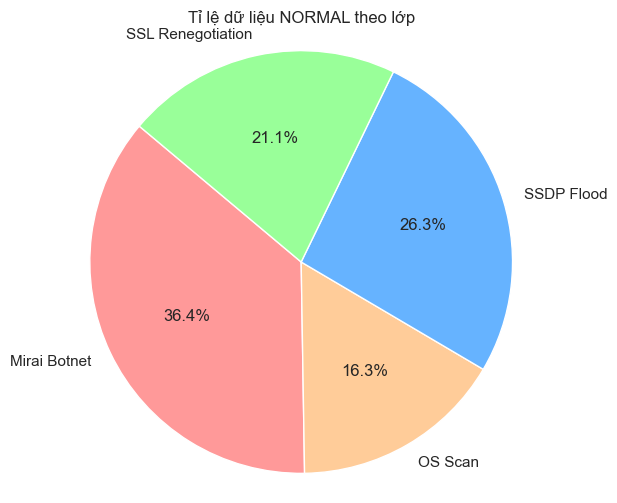

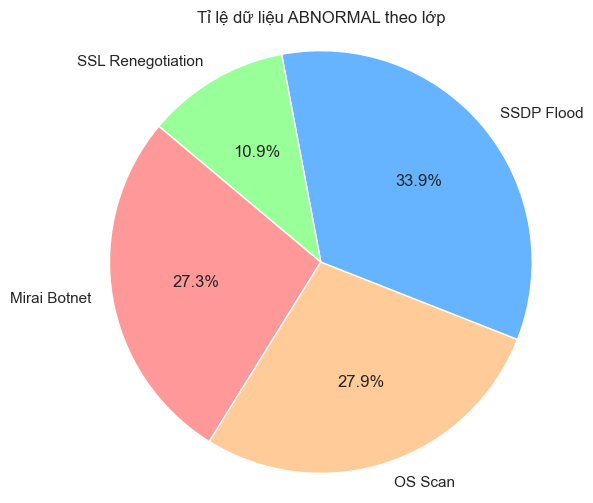

In [113]:
import matplotlib.pyplot as plt

ordered_labels = ['Mirai Botnet', 'OS Scan', 'SSDP Flood', 'SSL Renegotiation']

color_map = {
    'Mirai Botnet': '#ff9999',
    'SSDP Flood': '#66b3ff',
    'SSL Renegotiation': '#99ff99',
    'OS Scan': '#ffcc99'
}

colors = [color_map[label] for label in ordered_labels]


# Đếm và reindex theo thứ tự đã định
normal_counts = full_data[full_data['Label'] == 0]['Device'].value_counts()
abnormal_counts = full_data[full_data['Label'] == 1]['Device'].value_counts()

normal_counts = normal_counts.reindex(ordered_labels, fill_value=0)
abnormal_counts = abnormal_counts.reindex(ordered_labels, fill_value=0)

# Vẽ biểu đồ tròn cho dữ liệu normal và abnormal theo lớp
# Normal
plt.figure(figsize=(6, 6))
plt.pie(normal_counts, labels=ordered_labels, autopct='%1.1f%%',
        startangle=140, colors=colors)
plt.title('Tỉ lệ dữ liệu NORMAL theo lớp')
plt.axis('equal')
plt.show()

# Abnormal
plt.figure(figsize=(6, 6))
plt.pie(abnormal_counts, labels=ordered_labels, autopct='%1.1f%%',
        startangle=140, colors=colors)
plt.title('Tỉ lệ dữ liệu ABNORMAL theo lớp')
plt.axis('equal')
plt.show()



In [114]:
sum(full_data[full_data['Label'] == 0]['Device'].value_counts())

20065

In [115]:
sum(full_data[full_data['Label'] == 1]['Device'].value_counts())

21209

In [116]:
# Kiểm tra giá trị bất thường (NaN, vô cực)
print("Số lượng giá trị NaN:", full_data.isnull().sum().sum())
print("Số lượng giá trị vô cực:", np.isinf(full_data.select_dtypes(include=[np.number])).sum().sum())

Số lượng giá trị NaN: 0
Số lượng giá trị vô cực: 0


In [117]:
full_data.head(10)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Label,Device
0,90.704507,751.945632,4.371554e+05,158.831357,751.487774,4.378729e+05,501.620975,749.878993,4.386117e+05,5082.062606,...,0.000000e+00,27172.699685,159.325487,210.386162,159.325487,4.426234e+04,0.000000e+00,0.000000e+00,0,SSL Renegotiation
1,91.502048,747.154629,4.379301e+05,156.654725,747.627114,4.388614e+05,497.246261,747.014972,4.399256e+05,4898.673337,...,0.000000e+00,27025.377133,158.069077,204.457774,158.069077,4.180298e+04,0.000000e+00,0.000000e+00,0,SSL Renegotiation
2,48.109426,1372.057092,8.306221e+04,84.379923,1382.093817,6.894189e+04,251.335426,1394.684001,5.140919e+04,2474.373852,...,4.729444e-08,25169.739882,1403.162896,205.050472,1404.445126,4.204570e+04,-1.314918e-11,-8.574332e-09,0,SSL Renegotiation
3,209.792873,744.091566,4.391331e+05,344.102309,741.967757,4.393693e+05,1029.826229,743.054793,4.395747e+05,10327.853782,...,0.000000e+00,43722.038445,1450.000000,0.000114,1450.000000,1.303852e-08,0.000000e+00,0.000000e+00,0,SSL Renegotiation
4,78.243098,742.244106,4.499299e+05,86.072514,741.622556,4.497790e+05,181.227407,746.623403,4.446382e+05,4082.461335,...,0.000000e+00,25783.176173,161.949683,221.185184,161.949683,4.892289e+04,0.000000e+00,0.000000e+00,0,SSL Renegotiation
5,26.078351,60.000000,4.547474e-13,42.887801,60.000000,4.547474e-13,126.090346,60.000000,1.364242e-12,1224.693988,...,1.828112e-08,12044.183151,60.000000,0.000005,1407.219063,3.831605e+04,2.000001e-12,1.939947e-09,0,SSL Renegotiation
6,111.316124,744.655258,4.407185e+05,183.361607,743.763939,4.404003e+05,531.912511,743.777109,4.397789e+05,4866.799011,...,0.000000e+00,27018.065448,158.012316,203.914434,158.012316,4.158110e+04,0.000000e+00,0.000000e+00,0,SSL Renegotiation
7,144.365098,756.281799,4.433403e+05,201.747478,754.375723,4.402147e+05,528.847230,752.192623,4.382680e+05,5030.333670,...,0.000000e+00,21770.351336,1450.000000,0.000075,1450.000000,5.587935e-09,0.000000e+00,0.000000e+00,0,SSL Renegotiation
8,65.067833,1425.339836,1.993858e+04,101.821065,1420.519059,2.244639e+04,281.444105,1410.490422,3.129114e+04,2569.752178,...,1.226508e-08,24318.991231,1409.053811,188.855548,1410.330686,3.566642e+04,-1.644230e-11,-5.773813e-08,0,SSL Renegotiation
9,98.206563,743.313156,4.365318e+05,168.015665,743.275329,4.367528e+05,513.457227,743.105285,4.362407e+05,4938.703312,...,0.000000e+00,21809.692117,1450.000000,0.000089,1450.000000,7.916242e-09,0.000000e+00,0.000000e+00,0,SSL Renegotiation


In [118]:
normal_data = full_data[full_data['Label'] == 0].iloc[:,:-1]
normal_data = normal_data.drop(['Label'], axis=1)
normal_device_label = full_data[full_data['Label'] == 0].iloc[:,-1]
normal_data.shape

(20065, 115)

In [119]:
abnormal_data = full_data[full_data['Label'] == 1].iloc[:,:-1]
abnormal_data = abnormal_data.drop(['Label'], axis=1)
abnormal_device_label = full_data[full_data['Label'] == 1].iloc[:,-1]
abnormal_data.shape

(21209, 115)

In [120]:
normal_device_mapping = {
    v: k for k, v in enumerate(normal_device_label.unique())
}
abnormal_device_mapping = {
    v: k for k, v in enumerate(abnormal_device_label.unique())
}
encoded_abnormal_device = abnormal_device_label.map(abnormal_device_mapping)
encoded_normal_device = normal_device_label.map(normal_device_mapping)

In [121]:
encoded_normal_device

0        0
1        0
2        0
3        0
4        0
        ..
20060    3
20061    3
20062    3
20063    3
20064    3
Name: Device, Length: 20065, dtype: int64

In [122]:
normal_device_mapping

{'SSL Renegotiation': 0, 'SSDP Flood': 1, 'OS Scan': 2, 'Mirai Botnet': 3}

In [123]:
abnormal_device_mapping

{'SSL Renegotiation': 0, 'SSDP Flood': 1, 'OS Scan': 2, 'Mirai Botnet': 3}

In [124]:
test_normal_data = normal_data.sample(n = int(0.4 * normal_data.shape[0]), random_state=42)
test_normal_label = encoded_normal_device.iloc[test_normal_data.index]

normal_data = normal_data.drop(test_normal_data.index)
encoded_normal_device = encoded_normal_device.drop(test_normal_label.index)
# normal_data
encoded_normal_device

1        0
2        0
4        0
7        0
9        0
        ..
20058    3
20059    3
20061    3
20062    3
20064    3
Name: Device, Length: 12039, dtype: int64

In [125]:
from fedartml import InteractivePlots

import seaborn as sns
sns.set(style="darkgrid")
random_state = 42
# Instanciate InteractivePlots object
my_plot = InteractivePlots(labels = encoded_normal_device.values, random_state = random_state, distance = "jensen-shannon")

# Show plot
my_plot.show_stacked_distr_dirichlet()

interactive(children=(FloatLogSlider(value=1000.0, description='Alpha', layout=Layout(width='1000px'), max=3.0…

()

In [126]:
from fedartml import SplitAsFederatedData

# Instantiate a SplitAsFederatedData object
my_federater = SplitAsFederatedData(random_state = 42)

# Get federated dataset from centralized dataset
clients_glob_dic, list_ids_sampled_dic, miss_class_per_node, distances = my_federater.create_clients(image_list = normal_data.values.tolist(), label_list = encoded_normal_device, 
                                                             num_clients = 10, prefix_cli='Local_node',
                                                        method = "dirichlet", alpha = 1000)


In [127]:
clients_glob = clients_glob_dic['without_class_completion']
list_ids_sampled = list_ids_sampled_dic['without_class_completion']

In [128]:
data = clients_glob['Local_node_5']
data = [list(item[0]) + [item[1]] for item in data]
node_5 = pd.DataFrame(data)
node_5.head(5)

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,62.250143,1358.435932,163065.982309,101.591458,1352.670924,167467.532637,290.858578,1343.784105,174208.610649,2820.898782,...,0.000000e+00,0.000000e+00,27860.037596,1341.626819,417.538832,1341.626819,1.743387e+05,0.000000e+00,0.000000e+00,2
1,103.045669,740.913701,439617.507313,180.006286,742.007588,441095.368909,538.261586,739.800016,441153.984720,4955.147488,...,0.000000e+00,0.000000e+00,26176.465660,152.271973,197.928049,152.271973,3.917551e+04,0.000000e+00,0.000000e+00,0
2,67.005106,1247.210659,38486.375868,104.700396,1243.616086,42202.192373,304.393463,1238.957807,45323.769652,3048.146477,...,-6.144782e-13,-6.009584e-10,30535.363736,1240.653759,201.269240,1242.103760,4.050931e+04,2.783625e-11,2.692987e-08,2
3,79.243073,754.058590,429923.273277,145.723051,751.895781,432159.109985,486.128431,749.777502,434656.716080,5108.794218,...,0.000000e+00,0.000000e+00,22891.908739,1450.000000,0.000116,1450.000000,1.350418e-08,0.000000e+00,0.000000e+00,0
4,103.695350,740.532967,442550.230784,178.825486,745.357340,441891.882692,496.878478,749.128795,440414.029865,3835.130844,...,0.000000e+00,0.000000e+00,26056.113511,152.712053,199.904098,152.712053,3.996165e+04,0.000000e+00,0.000000e+00,0


In [129]:
clients_glob = clients_glob_dic['without_class_completion']
list_ids_sampled = list_ids_sampled_dic['without_class_completion']

In [130]:
import os

client_data_path = "../../Data/Kitsune Network Attack Dataset/Client_Data"
for idx, client in enumerate(clients_glob):
    normal_data_path = os.path.join(client_data_path, f"Client-{idx+1}" ,"normal")
    if not os.path.exists(normal_data_path):
        os.makedirs(normal_data_path)
    client_data = clients_glob[client]
    client_data = [list(item[0]) + [item[1]] for item in client_data]
    client_data = pd.DataFrame(client_data)
    last_column = client_data.columns[-1]
    
    # Group by the last column and filter out the minority classes
    client_data = client_data.groupby(last_column).filter(lambda x: len(x) >= 10)
    client_data = client_data.iloc[:, :-1]
    print(len(client_data))
    client_data.to_csv(os.path.join(normal_data_path, "data.csv"), index=False, header=False)

1196
1224
1202
1182
1193
1206
1199
1187
1205
1245


In [131]:
for idx, client in enumerate(clients_glob):
    normal_data_path = os.path.join(client_data_path, f"Client-{idx+1}" ,"normal")
    client_data = clients_glob[client]
    client_data = [list(item[0]) + [item[1]] for item in client_data]
    client_data = pd.DataFrame(client_data)
    # Get the name of the last column
    last_column = client_data.columns[-1]
    
    # Group by the last column and filter out the minority classes
    client_data = client_data.groupby(last_column).filter(lambda x: len(x) >= 10)
    client_labels = client_data.iloc[:,-1]
    print(client_labels.value_counts())


115
3    428
1    311
0    262
2    195
Name: count, dtype: int64
115
3    438
1    319
0    261
2    206
Name: count, dtype: int64
115
3    438
1    321
0    245
2    198
Name: count, dtype: int64
115
3    426
1    301
0    254
2    201
Name: count, dtype: int64
115
3    432
1    314
0    248
2    199
Name: count, dtype: int64
115
3    413
1    328
0    260
2    205
Name: count, dtype: int64
115
3    447
1    299
0    250
2    203
Name: count, dtype: int64
115
3    427
1    308
0    245
2    207
Name: count, dtype: int64
115
3    418
1    321
0    268
2    198
Name: count, dtype: int64
115
3    479
1    315
0    255
2    196
Name: count, dtype: int64


In [132]:
from fedartml import InteractivePlots

import seaborn as sns
sns.set(style="darkgrid")
random_state = 42
# Instanciate InteractivePlots object
my_plot = InteractivePlots(labels = encoded_abnormal_device.values, random_state = random_state, distance = "jensen-shannon")

# Show plot
my_plot.show_stacked_distr_dirichlet()

interactive(children=(FloatLogSlider(value=1000.0, description='Alpha', layout=Layout(width='1000px'), max=3.0…

()

In [133]:
from fedartml import SplitAsFederatedData

# Instantiate a SplitAsFederatedData object
my_federater = SplitAsFederatedData(random_state = 42)

# Get federated dataset from centralized dataset
abnormal_clients_glob_dic, abnormal_list_ids_sampled_dic, abnormal_miss_class_per_node, abnormal_distances = my_federater.create_clients(image_list = abnormal_data.values.tolist(), label_list = encoded_abnormal_device, 
                                                             num_clients = 10, prefix_cli='Local_node',
                                                        method = "dirichlet", alpha = 1)


In [134]:
clients_glob = abnormal_clients_glob_dic['without_class_completion']
list_ids_sampled = abnormal_list_ids_sampled_dic['without_class_completion']

In [135]:
import os

client_data_path = "../../Data/Kitsune Network Attack Dataset/Client_Data"
for idx, client in enumerate(clients_glob):
    abnormal_data_path = os.path.join(client_data_path, f"Client-{idx+1}" ,"abnormal")
    if not os.path.exists(abnormal_data_path):
        os.makedirs(abnormal_data_path)
    client_data = clients_glob[client]
    client_data = [list(item[0]) + [item[1]] for item in client_data]
    client_data = pd.DataFrame(client_data)
    last_column = client_data.columns[-1]
    
    # Group by the last column and filter out the minority classes
    client_data = client_data.groupby(last_column).filter(lambda x: len(x) >= 10)
    
    client_data = client_data.iloc[:, :-1]
    print(len(client_data))
    client_data.to_csv(os.path.join(abnormal_data_path, "data.csv"), index=False, header=False)

1573
1528
1838
1610
2130
3241
2150
1665
2351
3123


In [136]:
res = []
client_labels = []
for idx, client in enumerate(clients_glob):
    normal_data_path = os.path.join(client_data_path, f"Client-{idx+1}" ,"normal")
    client_data = clients_glob[client]
    client_data = [list(item[0]) + [item[1]] for item in client_data]
    client_data = pd.DataFrame(client_data)
    # Get the name of the last column
    last_column = client_data.columns[-1]
    
    # Group by the last column and filter out the minority classes
    client_data = client_data.groupby(last_column).filter(lambda x: len(x) >= 10)
    client_labels = client_data.iloc[:,-1].unique().tolist()
    # label_counts = client_labels.value_counts()
    print(client_data.iloc[:,-1].value_counts())
    res.append(client_labels)
print(f"client_labels={res}")
client_labels = res

115
2    960
0    289
3    177
1    147
Name: count, dtype: int64
115
2    1021
3     312
1     168
0      27
Name: count, dtype: int64
115
1    960
0    417
2    335
3    126
Name: count, dtype: int64
115
3    830
1    419
2    321
0     40
Name: count, dtype: int64
115
1    1612
0     518
Name: count, dtype: int64
115
2    1613
1    1177
0     451
Name: count, dtype: int64
115
3    1179
1     586
0     365
2      20
Name: count, dtype: int64
115
1    1177
2     275
3     202
0      11
Name: count, dtype: int64
115
3    1148
1     799
2     297
0     107
Name: count, dtype: int64
115
3    1808
2    1071
1     153
0      91
Name: count, dtype: int64
client_labels=[[2, 3, 0, 1], [1, 2, 0, 3], [1, 2, 3, 0], [3, 0, 1, 2], [1, 0], [1, 2, 0], [0, 3, 1, 2], [2, 3, 1, 0], [1, 2, 3, 0], [3, 2, 1, 0]]


In [137]:
import numpy as np
import pandas as pd

def split_data_with_fixed_label_percentage(data, labels, label_distribution, label_percentage=0.1):
    '''
    Splits the dataset into sub-datasets based on a given label distribution.
    Each label type in each sub-dataset constitutes a fixed percentage of the total data samples.

    data: DataFrame or 2D array-like with data samples
    labels: Series or array-like with labels
    label_distribution: List of lists, each sublist contains labels for a specific client
    label_percentage: Fixed percentage of each label type in each sub-dataset
    '''
    if not isinstance(data, pd.DataFrame):
        data = pd.DataFrame(data)
    if not isinstance(labels, pd.Series):
        labels = pd.Series(labels)

    if 'label' not in data.columns:
        data['label'] = labels

    # Count total samples per label
    label_counts = labels.value_counts()

    clients_split = []
    for client_labels in label_distribution:
        client_data = pd.DataFrame()

        for label in client_labels:
            max_samples = int(np.floor(label_counts[label] * label_percentage))
            label_data = data[data['label'] == label].head(max_samples)
            client_data = pd.concat([client_data, label_data])

            # Update the main data to remove selected samples
            data = data.drop(label_data.index)

        clients_split.append((client_data.iloc[:,:-1], client_data.iloc[:,-1]))

    def print_split(clients_split):
        print("Data split:")
        for i, client in enumerate(clients_split):
            split = np.sum(client[1].values.reshape(
                1, -1) == np.arange(label_counts.shape[0]).reshape(-1, 1), axis=1)
            print(" - Client {}: {}".format(i, split))
        print()
        # You can access the split data for each client
        for i, client in enumerate(clients_split):
            client_data, client_labels = client
            print(
                f"Client {i} - Data shape: {client_data.shape}, Labels: {np.unique(client_labels)}")
    print_split(clients_split)

    return clients_split


test_normal_split = split_data_with_fixed_label_percentage(test_normal_data, 
                                                        test_normal_label, client_labels)


Data split:
 - Client 0: [168 213 125 295]
 - Client 1: [168 213 125 295]
 - Client 2: [168 213 125 295]
 - Client 3: [168 213 125 295]
 - Client 4: [168 213   0   0]
 - Client 5: [168 213 125   0]
 - Client 6: [168 213 125 295]
 - Client 7: [168 213 125 295]
 - Client 8: [168 213 125 295]
 - Client 9: [168 213 125 295]

Client 0 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 1 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 2 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 3 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 4 - Data shape: (381, 115), Labels: [0 1]
Client 5 - Data shape: (506, 115), Labels: [0 1 2]
Client 6 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 7 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 8 - Data shape: (801, 115), Labels: [0 1 2 3]
Client 9 - Data shape: (801, 115), Labels: [0 1 2 3]


In [138]:
import os

client_data_path = "../../Data/Kitsune Network Attack Dataset/Client_Data"
for idx, test_normal in enumerate(test_normal_split):
    # client_data = np.concatenate([normal[0], abnormal[0]], axis=0)
    # client_label = np.concatenate([normal[1], abnormal[1]], axis=0)
    # client = np.concatenate((client_data, client_label.reshape(-1, 1)), axis=1)

    test_normal_path = os.path.join(client_data_path, f"Client-{idx+1}" ,"test_normal")
    if not os.path.exists(test_normal_path):
        os.makedirs(test_normal_path)
        
    np.savetxt(os.path.join(test_normal_path, "data.csv"), test_normal[0], delimiter=",")
    # **********************************************************************************************

In [139]:
for idx, client in enumerate(clients_glob):
    client_data = clients_glob[client]
    client_data = [list(item[0]) + [item[1]] for item in client_data]
    client_data = pd.DataFrame(client_data)
    last_column = client_data.columns[-1]
    print(f"Client {idx+1} label distribution:")
    print(client_data[last_column].value_counts())

Client 1 label distribution:
115
2    960
0    289
3    177
1    147
Name: count, dtype: int64
Client 2 label distribution:
115
2    1021
3     312
1     168
0      27
Name: count, dtype: int64
Client 3 label distribution:
115
1    960
0    417
2    335
3    126
Name: count, dtype: int64
Client 4 label distribution:
115
3    830
1    419
2    321
0     40
Name: count, dtype: int64
Client 5 label distribution:
115
1    1612
0     518
Name: count, dtype: int64
Client 6 label distribution:
115
2    1613
1    1177
0     451
Name: count, dtype: int64
Client 7 label distribution:
115
3    1179
1     586
0     365
2      20
Name: count, dtype: int64
Client 8 label distribution:
115
1    1177
2     275
3     202
0      11
Name: count, dtype: int64
Client 9 label distribution:
115
3    1148
1     799
2     297
0     107
Name: count, dtype: int64
Client 10 label distribution:
115
3    1808
2    1071
1     153
0      91
Name: count, dtype: int64


In [140]:
from fedartml import InteractivePlots

import seaborn as sns
sns.set(style="darkgrid")
random_state = 42
# Instanciate InteractivePlots object
my_plot = InteractivePlots(labels = encoded_normal_device.values, random_state = random_state, distance = "jensen-shannon")

# Show plot
my_plot.show_stacked_distr_dirichlet()

interactive(children=(FloatLogSlider(value=1000.0, description='Alpha', layout=Layout(width='1000px'), max=3.0…

()